# Listing 6.1 Rename

In [1]:
import pandas as pd


df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print(df.head())

df = df.rename(columns={
    'FIRST_NAME': 'Name',
    'YOB': 'Year Of Birth',
    'ENROLL': 'Enrollment Code',
    'DESIGNATE': 'Special Designations',
    'DT_ACCEPT': 'Date Accepted (Date of Registration)',
    'CG': 'Congressional District',
    'CTY': 'County ID',
    'DT_CHG': 'Date Changed',
    'DT_LAST_VPH': 'Date Of Last Statewide Election with VPH'
})


print(df)


print("DataFrame with labeled columns:")
for column in df.columns:
    print(column)

# df.to_csv('voters_labeled.csv', index=False)


        FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R            10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0              
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  
          FIRST NAME Year Of Birth Enrollment Code Special Designations  \
0        Eula Vitolo          1913               R                        
1     Walton Santoyo          1918               R                        
2     Aletha Stabile          1925               D                        
3     Nannette Thong          1928               D                        
4    Courtney Bonner          1929               R    

# Listing 6.2 Format

In [3]:
import pandas as pd
from datetime import datetime

data = {
    'PatientID': [1, 2, 3],
    'Age': [25, 34, 50],
    'ArrivingDate': ['2024-06-10', '2024-06-11', '2024-06-12'],
    'ArrivingTime': ['09:00', '10:30', '14:45'],
    'LeavingDate': ['2024-06-10', '2024-06-11', '2024-06-12'],
    'LeavingTime': ['10:00', '11:15', '15:30'],
    'VisitFees': [100.0, 150.75, 200.5]
}

df = pd.DataFrame(data)
print("Datatypes of raw data:")
print("\n",df.dtypes)
print("\nHeader of the original dataset:(",len(df.columns),"columns)")
print("\n",df.head())

df['ArrivingDateTime'] = pd.to_datetime(df['ArrivingDate'] + ' ' + df['ArrivingTime'])
df['LeavingDateTime'] = pd.to_datetime(df['LeavingDate'] + ' ' + df['LeavingTime'])

df['VisitDuration'] = df['LeavingDateTime'] - df['ArrivingDateTime']

dummy=df[['VisitDuration', 'LeavingDateTime', 'ArrivingDateTime']]
print("\nComputing the visit duration:")
print("\n",dummy.head())

def format_duration(duration):
    seconds = duration.total_seconds()
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    return f"{hours}h {minutes}m"

def format_fees(fees):
    return '${:,.2f}'.format(fees)

print("\nClinic Visit Report:")

df['FormattedDuration'] = df['VisitDuration'].apply(format_duration)
df['FormattedFees'] = df['VisitFees'].apply(format_fees)
print("\n", df[['PatientID', 'Age', 'FormattedDuration', 'FormattedFees']])


Datatypes of raw data:

 PatientID         int64
Age               int64
ArrivingDate     object
ArrivingTime     object
LeavingDate      object
LeavingTime      object
VisitFees       float64
dtype: object

Header of the original dataset:( 7 columns)

    PatientID  Age ArrivingDate ArrivingTime LeavingDate LeavingTime  VisitFees
0          1   25   2024-06-10        09:00  2024-06-10       10:00     100.00
1          2   34   2024-06-11        10:30  2024-06-11       11:15     150.75
2          3   50   2024-06-12        14:45  2024-06-12       15:30     200.50

Computing the visit duration:

     VisitDuration     LeavingDateTime    ArrivingDateTime
0 0 days 01:00:00 2024-06-10 10:00:00 2024-06-10 09:00:00
1 0 days 00:45:00 2024-06-11 11:15:00 2024-06-11 10:30:00
2 0 days 00:45:00 2024-06-12 15:30:00 2024-06-12 14:45:00

Clinic Visit Report:

    PatientID  Age FormattedDuration FormattedFees
0          1   25             1h 0m       $100.00
1          2   34            0h 45m      

# Listing 6.3 New Variables

In [2]:
import pandas as pd


df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print("Dataframe Shape (rows, columns):",df.shape)
print("\nRaw data-first 5 rows:\n",df.head())
print("\nDatatypes of raw data:\n")
print("\n",df.dtypes)

df['YOB_numeric'] = pd.to_numeric(df['YOB'], errors='coerce')
print("\nDatatypes after typecasting:\n")
print("\n",df.dtypes)

age = 2024 - df['YOB_numeric']

print("\nage:\n",age.head())

df['age']=age
print("\nDataframe's first 5 rows after creating new variables:\n",df.head())
print("\nDataframe Shape after adding new columns to it (rows, columns):",df.shape)

Dataframe Shape (rows, columns): (100, 9)

Raw data-first 5 rows:
         FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R            10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0              
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  

Datatypes of raw data:


 FIRST NAME     object
YOB            object
ENROLL         object
DESIGNATE      object
DT ACCEPT      object
CG             object
CTY            object
DT CHG         object
DT LAST VPH    object
dtype: object

Datatypes after typecasting:


 FIRST NAME      object
YOB             object
ENROLL          object
DESIGNATE       objec

# Listing 6.4 Rearrange Variables

In [3]:
import pandas as pd


df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print("\nRaw data-first 5 rows:\n",df.head())
df['YOB_numeric'] = pd.to_numeric(df['YOB'], errors='coerce')

df['age'] = 2024 - df['YOB_numeric']

df=df[['FIRST NAME', 'YOB', 'age', 'ENROLL', 'DESIGNATE','DT ACCEPT', 'CG', 'CTY','DT CHG', 'DT LAST VPH']]
print("\nThe df after rearranging:\n",df.head())


Raw data-first 5 rows:
         FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R            10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0              
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  

The df after rearranging:
         FIRST NAME   YOB    age ENROLL DESIGNATE   DT ACCEPT CG    CTY  \
0      Eula Vitolo  1913  111.0      R             12/5/1935  2  01AND   
1   Walton Santoyo  1918  106.0      R              9/8/1947  2  01AND   
2   Aletha Stabile  1925   99.0      D            10/14/1952  2  01AND   
3   Nannette Thong  1928   96.0      D             11/8/2005  2  01AND   
4  Cou

# Listing 6.5 IF Statement

In [4]:
import pandas as pd

df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print("\nRaw data-first 5 rows:\n",df.head())
df['YOB_numeric'] = pd.to_numeric(df['YOB'], errors='coerce')

df['age'] = 2024 - df['YOB_numeric']

for x in df.index:
    if df.loc[x, "age"] > 150:
        print("\nThe rows with the wrong ages:\n",df.loc[x])
        df.loc[x, "age"] = "NaN"
        print("\nReplacing the wrong ages with NaN:\n",df.loc[x])



Raw data-first 5 rows:
         FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R            10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0              
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  

The rows with the wrong ages:
 FIRST NAME     Mckinley Guynn
YOB                      1680
ENROLL                      D
DESIGNATE                    
DT ACCEPT          11/27/2007
CG                          2
CTY                     01AND
DT CHG             10/18/2011
DT LAST VPH         11/4/2014
YOB_numeric            1680.0
age                     344.0
Name: 89, dtype: object

Replacing the wro

# Listing 6.6 IF-ELIF Statement


Raw data-first 5 rows:
         FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R            10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0              
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  

checking age_group:
         FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   

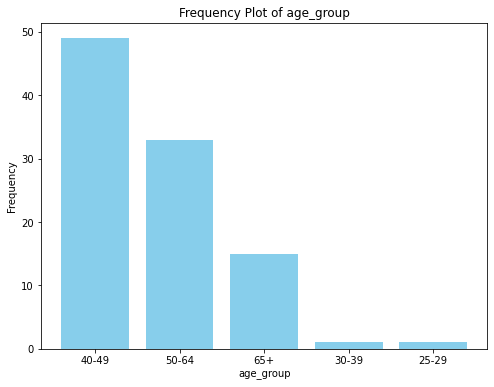

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print("\nRaw data-first 5 rows:\n",df.head())
df['YOB_numeric'] = pd.to_numeric(df['YOB'], errors='coerce')

df['age'] = 2024 - df['YOB_numeric']
for x in df.index:
    #if (df.loc[x,'age']>=18 and df.loc[x,'age']<=24):
    if (18<=df.loc[x,'age']<=24):
        df.loc[x,'age_group']='18-24'
    elif (25<=df.loc[x,'age']<=29) :
        df.loc[x,'age_group']='25-29'
    elif (30<=df.loc[x,'age']<=39) :
        df.loc[x,'age_group']='30-39'
    elif (40<=df.loc[x,'age']<=49) :
        df.loc[x,'age_group']='40-49'
    elif (50<=df.loc[x,'age']<=64) :
        df.loc[x,'age_group']='50-64'
    elif (df.loc[x,'age']>=65) :
        df.loc[x,'age_group']='65+';

print("\nchecking age_group:\n",df.head())

frequency_table = df['age_group'].value_counts().to_frame('Frequency').reset_index()

frequency_table.columns = ['age_group', 'Frequency']

frequency_table = frequency_table.sort_values(by='Frequency', ascending=False)

print("\n",frequency_table)

plt.figure(figsize=(8, 6))
plt.bar(frequency_table['age_group'], frequency_table['Frequency'], color='skyblue')
plt.xlabel('age_group')
plt.ylabel('Frequency')
plt.title('Frequency Plot of age_group')
plt.show()

# Listing 6.7 Drop a Row

In [6]:
import pandas as pd


df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print("Dataframe Shape (rows, columns):",df.shape)
print("\nRaw data-first 5 rows:\n",df.head())

df['YOB_numeric'] = pd.to_numeric(df['YOB'], errors='coerce')

rows_with_errors = df[df['YOB_numeric'].isna()]
print("\nRows with coercing errors in 'YOB':")
print(rows_with_errors)

df.drop([83],axis=0,inplace=True)
rows_with_errors = df[df['YOB_numeric'].isna()]
print("\nChecking if the row with errors was deleted or not:")
print(rows_with_errors)
print("Further verification by checking the Dataframe Shape (rows, columns):",df.shape)

Dataframe Shape (rows, columns): (100, 9)

Raw data-first 5 rows:
         FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R             12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R              9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D            10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D             11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R            10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0              
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  

Rows with coercing errors in 'YOB':
       FIRST NAME YOB ENROLL DESIGNATE DT ACCEPT CG CTY DT CHG DT LAST VPH  \
83  Cletus Bodine                                                            

    YOB_numeric  
83          NaN  

Checking if the row with errors was deleted or not:
Empty DataFrame
Columns: [FIRST NAME, YOB, ENROLL, DESIGNATE, DT ACCEPT, CG, CT

# Listing 6.8 Drop a Column

In [7]:
import pandas as pd

import numpy as np
df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')
print("The size of the dataframe:",df.shape)
df.replace(to_replace=[r'^\s*$', '', None], value=np.nan, regex=True, inplace=True)
print(df.isnull().sum())

print("The dataframe before dropping:")
print(df.head())

df.drop("DESIGNATE",axis = 1, inplace = True)
print("The size of the dataframe:",df.shape)
print("The dataframe after dropping:")
print(df.head())



The size of the dataframe: (100, 9)
FIRST NAME       0
YOB              1
ENROLL           1
DESIGNATE      100
DT ACCEPT        1
CG               1
CTY              1
DT CHG           1
DT LAST VPH     34
dtype: int64
The dataframe before dropping:
        FIRST NAME   YOB ENROLL  DESIGNATE   DT ACCEPT CG    CTY      DT CHG  \
0      Eula Vitolo  1913      R        NaN   12/5/1935  2  01AND  11/26/2008   
1   Walton Santoyo  1918      R        NaN    9/8/1947  2  01AND   5/22/2008   
2   Aletha Stabile  1925      D        NaN  10/14/1952  2  01AND   5/17/2010   
3   Nannette Thong  1928      D        NaN   11/8/2005  2  01AND   4/25/2012   
4  Courtney Bonner  1929      R        NaN  10/20/2009  2  01AND   6/13/2012   

  DT LAST VPH  
0         NaN  
1   6/10/2008  
2   11/2/2010  
3   11/4/2008  
4   6/14/2016  
The size of the dataframe: (100, 8)
The dataframe after dropping:
        FIRST NAME   YOB ENROLL   DT ACCEPT CG    CTY      DT CHG DT LAST VPH
0      Eula Vitolo  1913    

# Listing 6.9 Subset

In [8]:
import pandas as pd

import numpy as np
df = pd.read_csv('../Datasets/Chapter 6/Voters_A.csv')

democrats=df[df['ENROLL']=="D"]
print(democrats.iloc[:,:6].head())
print(democrats.shape)

republicans=df[df['ENROLL']=="R"]
print(republicans.iloc[:,:6].head())
print(republicans.shape)

frequency_table = df['ENROLL'].value_counts().reset_index().rename(columns={'index': 'ENROLL', 'ENROLL': 'Frequency'})
frequency_table = frequency_table.sort_values(by='Frequency', ascending=False)
print(frequency_table)


            FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG
2       Aletha Stabile  1925      D            10/14/1952  2
3       Nannette Thong  1928      D             11/8/2005  2
8          Trisha Tuch  1949      D              5/8/2006  2
9   Vonda Delahoussaye  1950      D             11/2/1988  2
11    Flavia Adolphson  1986      D             6/16/2012  2
(24, 9)
        FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG
0      Eula Vitolo  1913      R             12/5/1935  2
1   Walton Santoyo  1918      R              9/8/1947  2
4  Courtney Bonner  1929      R            10/20/2009  2
5    Leda Glessner  1932      R            10/21/1968  2
6    Cammie Sidoti  1935      R            12/16/2004  2
(24, 9)
  ENROLL  Frequency
0      U         47
1      R         24
2      D         24
3      G          3
4      L          1
5                 1


# Listing 6.10 Append

In [ ]:
import pandas as pd

vertical_merged_df = pd.concat([democrats,republicans ], axis=0)

print("The size of the new dataframe=",vertical_merged_df.shape)
print("Vertical Merge Result:")
print(vertical_merged_df.iloc[:,:6])


The size of the new dataframe= (48, 9)
Vertical Merge Result:
             FIRST NAME   YOB ENROLL DESIGNATE   DT ACCEPT CG
2        Aletha Stabile  1925      D            10/14/1952  2
3        Nannette Thong  1928      D             11/8/2005  2
8           Trisha Tuch  1949      D              5/8/2006  2
9    Vonda Delahoussaye  1950      D             11/2/1988  2
11     Flavia Adolphson  1986      D             6/16/2012  2
12         Jarrod Sells  1995      D             12/8/2015  2
18        Carina Benson  1955      D             8/10/1998  2
29       Kylie Wolfgram  1971      D             12/4/1991  2
34       Salena Mcgowin  1972      D            01/01/1850  2
43   Alejandra Schuyler  1974      D            01/01/1850  2
44        Misti Shibata  1974      D            10/13/1992  2
45        Arleen Ranson  1974      D             11/5/1997  2
58        Walker Shippy  1976      D             8/30/1994  2
59      Jermaine Elston  1976      D            10/28/2004  2
60      

# Listing 6.11 Merge

In [9]:
import pandas as pd

file1 = pd.read_csv('../Datasets/Chapter 6/many.csv', low_memory=False)
file2 = pd.read_csv('../Datasets/Chapter 6/few.csv', low_memory=False)
print("\nThe Many Dataset Dimensions:\n",file1.shape)
print("\nThe Few Dataset Dimensions:\n",file2.shape)

zillow_merged = pd.merge(file1, file2, on='parcelid')
print("\nThe Merged Dataset dimensions:\n",zillow_merged.shape)

print("\nThe Merged Dataset Head:\n",zillow_merged.head())



The Many Dataset Dimensions:
 (3000, 58)

The Few Dataset Dimensions:
 (1000, 3)

The Merged Dataset dimensions:
 (1004, 60)

The Merged Dataset Head:
    parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5           3                  NaN                    NaN   
1          1.0           2                  NaN                    NaN   
2          2.0           3                  NaN                    NaN   
3          1.5           2                  NaN                    NaN   
4       